In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [3]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

In [5]:
df = pd.DataFrame(lista_alumnos, columns=['Nombre', "Edad", "Altura"])
df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


In [8]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


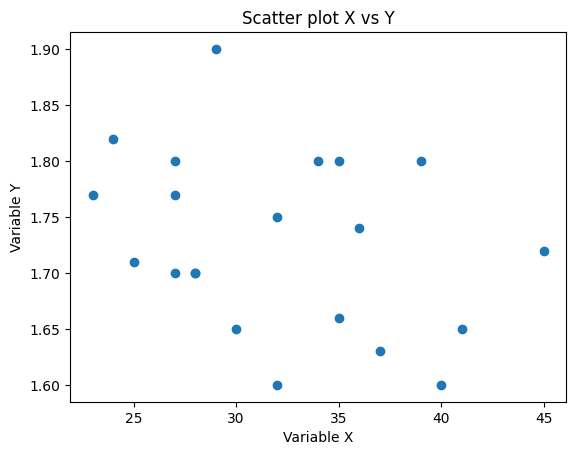

In [7]:
# Scatter plot
plt.scatter(df['Edad'],df['Altura'])

# Etiquetas
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.title("Scatter plot X vs Y")

# Mostrar gráfico
plt.show()

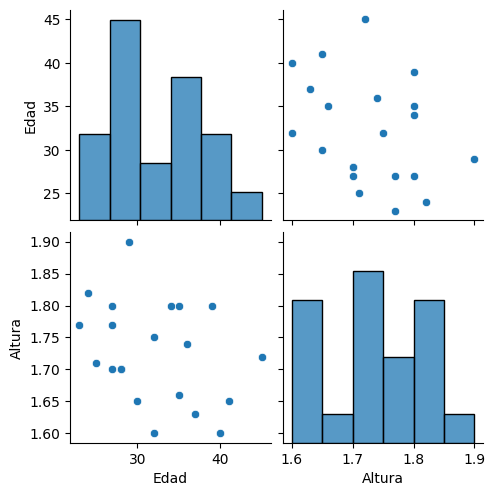

In [9]:
sns.pairplot(df)

In [12]:
corr =df.corr(numeric_only=True)
corr

,Edad,Altura
Edad,1.000000,-0.329275
Altura,-0.329275,1.000000


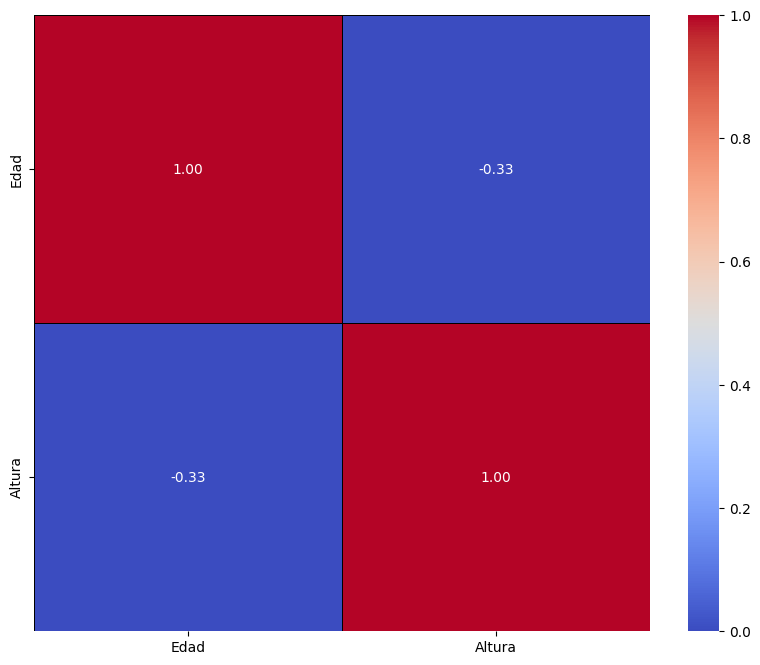

In [17]:
plt.figure(figsize=(10, 8)) # Ajustar tamaño
sns.heatmap(corr, 
            cmap='coolwarm',       # Paleta de colores (ej. 'YlGnBu', 'coolwarm')
            annot=True,           # Mostrar valores en las celdas
            fmt=".2f",            # Formato de los valores (ej. ".2f" para dos decimales)
            linewidths=.5,        # Grosor de las líneas entre celdas
            linecolor='black',    # Color de las líneas
            cbar=True,            # Mostrar la barra de color
            square=True,          # Celdas cuadradas
            vmin=0, vmax=1        # Rango de valores para el color
           )

plt.show()


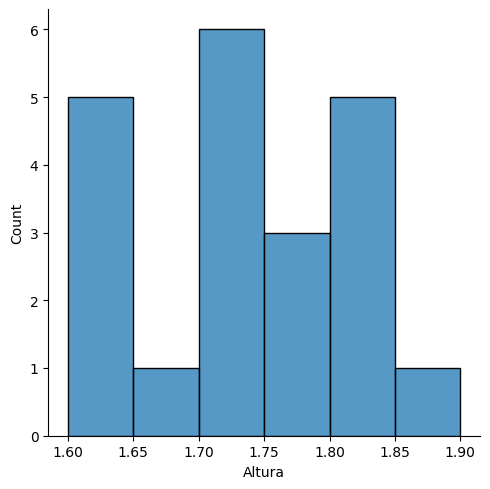

In [18]:
sns.displot(df['Altura']);

### Entrena un modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
X = df[['Edad']]
y = df['Altura']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)  

y = a + b*x

altura = a + b*Edad

In [26]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

In [27]:
modelo_linreg = LinearRegression()
modelo_linreg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Altura = 1.94 - 0.007 * Edad

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [28]:
print(modelo_linreg.intercept_)

1.858051298091961


In [29]:
modelo_linreg.coef_

array([-0.00435721])

In [33]:
predicciones = modelo_linreg.predict(X_test)

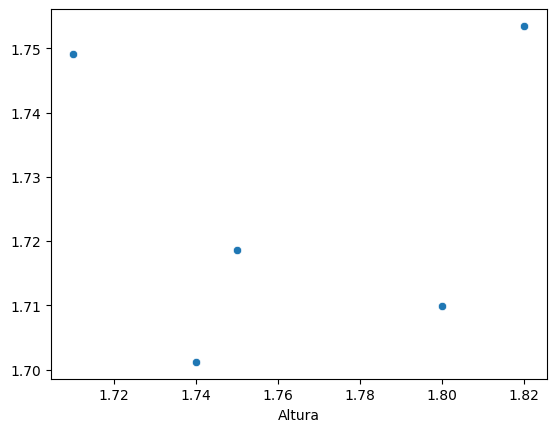

In [42]:
sns.scatterplot(x = y_test, y = predicciones);


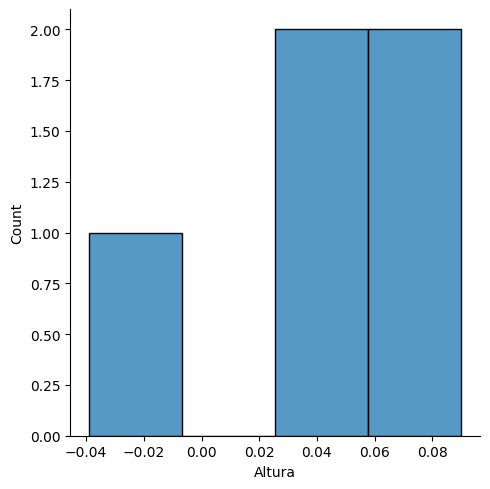

In [43]:
sns.displot((y_test - predicciones));

In [45]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE: 0.05318486080700664
MSE: 0.0033126493607306537
RMSE: 0.057555619714591326
